In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("puneet6060/intel-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/intel-image-classification


In [ ]:
from google.colab import files

# Upload kaggle.json
files.upload()


Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"abdulmuqeet07","key":"b5f6741845e4a5a68d2cc9a6221b18c5"}'}

In [ ]:
import os

# Create .kaggle directory if not exists
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json to the correct directory
!mv kaggle.json /root/.kaggle/

# Change permission to avoid permission issues
!chmod 600 /root/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!pip install kagglehub

import kagglehub

# Download the dataset
path = kagglehub.dataset_download("puneet6060/intel-image-classification")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/intel-image-classification


In [ ]:
import os

dataset_path = "/kaggle/input/intel-image-classification"
print("Contents of dataset folder:", os.listdir(dataset_path))


Contents of dataset folder: ['seg_train', 'seg_pred', 'seg_test']


In [ ]:
import shutil

destination_path = "/content/intel-image-classification"
shutil.copytree(dataset_path, destination_path, dirs_exist_ok=True)

print("Dataset copied successfully to:", destination_path)


Dataset copied successfully to: /content/intel-image-classification


In [ ]:
print("Files in the dataset folder:", os.listdir(destination_path))


Files in the dataset folder: ['seg_test', 'seg_train', 'seg_pred']


In [ ]:
!pip install tensorflow numpy matplotlib


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
train_dir = "/content/intel-image-classification/seg_train/seg_train"
test_dir = "/content/intel-image-classification/seg_test/seg_test"
val_dir = "/content/intel-image-classification/seg_pred"


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = '/content/intel-image-classification/seg_train/seg_train'
test_dir = '/content/intel-image-classification/seg_test/seg_test'

# Data augmentation for training
train_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = train_gen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze feature extractor

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,587,462 (9.87 MB)

 Trainable params: 329,478 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    callbacks=callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.5708 - loss: 1.1124

351/351 ━━━━━━━━━━━━━━━━━━━━ 188s 479ms/step - accuracy: 0.5712 - loss: 1.1113 - val_accuracy: 0.8809 - val_loss: 0.3539
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.8330 - loss: 0.4531

351/351 ━━━━━━━━━━━━━━━━━━━━ 153s 436ms/step - accuracy: 0.8330 - loss: 0.4531 - val_accuracy: 0.8877 - val_loss: 0.3117
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.8531 - loss: 0.3977

351/351 ━━━━━━━━━━━━━━━━━━━━ 157s 446ms/step - accuracy: 0.8531 - loss: 0.3977 - val_accuracy: 0.8905 - val_loss: 0.3061
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.8579 - loss: 0.3663

351/351 ━━━━━━━━━━━━━━━━━━━━ 155s 441ms/step - accuracy: 0.8579 - loss: 0.3663 - val_accuracy: 0.8944 - val_loss: 0.2903
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 167s 477ms/step - accuracy: 0.8687 - loss: 0.3531 - val_accuracy: 0.8951 - val_loss: 0.2941
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.8745 - loss: 0.3383

351/351 ━━━━━━━━━━━━━━━━━━━━ 190s 441ms/step - accuracy: 0.8745 - loss: 0.3383 - val_accuracy: 0.8973 - val_loss: 0.2885
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.8757 - loss: 0.3352

351/351 ━━━━━━━━━━━━━━━━━━━━ 166s 474ms/step - accuracy: 0.8757 - loss: 0.3352 - val_accuracy: 0.8976 - val_loss: 0.2851
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.8774 - loss: 0.3204

351/351 ━━━━━━━━━━━━━━━━━━━━ 191s 443ms/step - accuracy: 0.8774 - loss: 0.3204 - val_accuracy: 0.8959 - val_loss: 0.2714
Epoch 9/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 156s 444ms/step - accuracy: 0.8872 - loss: 0.3041 - val_accuracy: 0.9023 - val_loss: 0.2766
Epoch 10/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.8747 - loss: 0.3260

351/351 ━━━━━━━━━━━━━━━━━━━━ 154s 440ms/step - accuracy: 0.8747 - loss: 0.3259 - val_accuracy: 0.9048 - val_loss: 0.2661
Epoch 11/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 205s 450ms/step - accuracy: 0.8804 - loss: 0.3211 - val_accuracy: 0.9012 - val_loss: 0.2701
Epoch 12/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.8827 - loss: 0.3057

351/351 ━━━━━━━━━━━━━━━━━━━━ 166s 473ms/step - accuracy: 0.8827 - loss: 0.3057 - val_accuracy: 0.9073 - val_loss: 0.2619
Epoch 13/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 155s 440ms/step - accuracy: 0.8879 - loss: 0.2962 - val_accuracy: 0.9009 - val_loss: 0.2706
Epoch 14/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 153s 437ms/step - accuracy: 0.8874 - loss: 0.2983 - val_accuracy: 0.9030 - val_loss: 0.2665
Epoch 15/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 153s 437ms/step - accuracy: 0.8918 - loss: 0.2943 - val_accuracy: 0.9026 - val_loss: 0.2765
Epoch 16/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 155s 441ms/step - accuracy: 0.8953 - loss: 0.2781 - val_accuracy: 0.9051 - val_loss: 0.2627
Epoch 17/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.8948 - loss: 0.2829

351/351 ━━━━━━━━━━━━━━━━━━━━ 160s 456ms/step - accuracy: 0.8948 - loss: 0.2829 - val_accuracy: 0.9019 - val_loss: 0.2602
Epoch 18/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 164s 466ms/step - accuracy: 0.8936 - loss: 0.2760 - val_accuracy: 0.9048 - val_loss: 0.2678
Epoch 19/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 194s 442ms/step - accuracy: 0.8922 - loss: 0.2850 - val_accuracy: 0.9058 - val_loss: 0.2628
Epoch 20/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 153s 436ms/step - accuracy: 0.9014 - loss: 0.2627 - val_accuracy: 0.9026 - val_loss: 0.2667


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9090 - loss: 0.2380
✅ Test Accuracy: 0.91
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 133ms/step
              precision    recall  f1-score   support

   buildings       0.94      0.92      0.93       437
      forest       0.99      0.99      0.99       474
     glacier       0.87      0.79      0.83       553
    mountain       0.82      0.86      0.84       525
         sea       0.92      0.96      0.94       510
      street       0.93      0.95      0.94       501

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



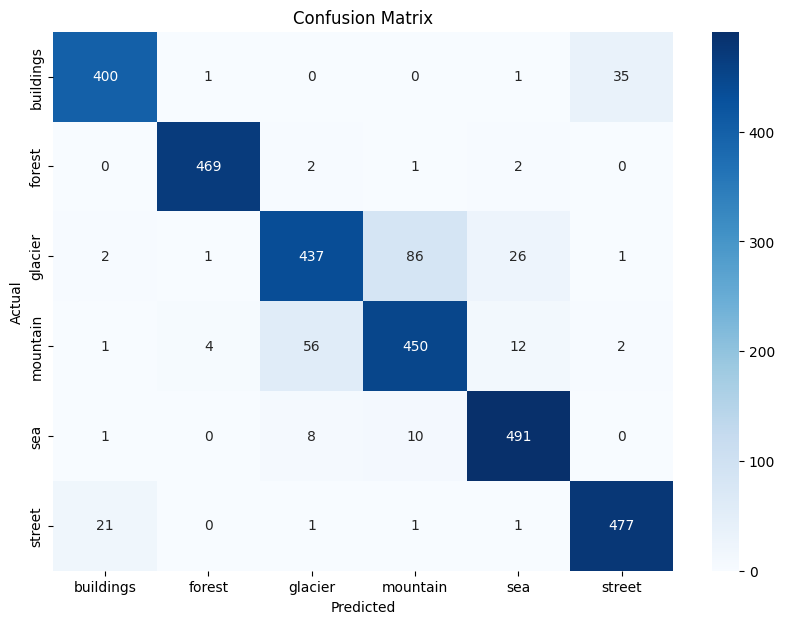

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate
loss, acc = model.evaluate(test_data)
print(f"✅ Test Accuracy: {acc:.2f}")

# Predict
predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)
y_true = test_data.classes
labels = list(test_data.class_indices.keys())

# Classification report
print(classification_report(y_true, y_pred, target_names=labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import os
from tensorflow.keras.preprocessing import image

pred_path = '/content/intel-image-classification/seg_pred/seg_pred'

for img_file in os.listdir(pred_path)[:5]:  # Predict on first 5 images
    img_path = os.path.join(pred_path, img_file)
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    class_name = labels[np.argmax(pred)]
    print(f"{img_file} → {class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
8443.jpg → sea
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6681.jpg → sea
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2538.jpg → mountain
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
22456.jpg → glacier
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
18948.jpg → street


In [ ]:
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# ✅ Use 'test_data' instead of 'test_loader'
preds = model.predict(test_data)  # shape: (num_samples, num_classes)
y_pred = np.argmax(preds, axis=1)
y_true = test_data.classes  # actual labels

# Extract class labels and count
labels = list(test_data.class_indices.keys())
n_classes = len(labels)

# Split classes into two groups
mid = n_classes // 2
group1_classes = list(range(mid))              # First half of classes
group2_classes = list(range(mid, n_classes))   # Second half

# Boolean masks for group-wise separation
group1_indices = np.isin(y_true, group1_classes)
group2_indices = np.isin(y_true, group2_classes)

# Calculate correctness
group1_correct = (y_pred[group1_indices] == y_true[group1_indices])
group2_correct = (y_pred[group2_indices] == y_true[group2_indices])

# Accuracy for each group
group1_acc = group1_correct.mean()
group2_acc = group2_correct.mean()

# Sample sizes
n1 = group1_correct.size
n2 = group2_correct.size

# T-test
t_stat, t_pval = stats.ttest_ind(group1_correct.astype(int), group2_correct.astype(int))
print("T-test:")
print("  t-statistic:", t_stat)
print("  p-value    :", t_pval)

# Z-test (manual calculation)
mean_diff = group1_acc - group2_acc
pooled_se = np.sqrt((group1_acc * (1 - group1_acc)) / n1 + (group2_acc * (1 - group2_acc)) / n2)
z_score = mean_diff / pooled_se
print("\nZ-test (approx):")
print("  z-score:", z_score)

# ANOVA (equivalent to t-test here, since we have two groups)
f_stat, f_pval = stats.f_oneway(group1_correct.astype(int), group2_correct.astype(int))
print("\nANOVA:")
print("  F-statistic:", f_stat)
print("  p-value    :", f_pval)

# Proportion Z-test
successes = np.array([group1_correct.sum(), group2_correct.sum()])
totals = np.array([n1, n2])
z_stat, prop_pval = proportions_ztest(successes, totals)
print("\nProportion Z-test:")
print("  z-statistic:", z_stat)
print("  p-value    :", prop_pval)

94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step
T-test:
  t-statistic: -2.949317235062166
  p-value    : 0.0032094004352259792

Z-test (approx):
  z-score: -2.939582637156031

ANOVA:
  F-statistic: 8.698472153034741
  p-value    : 0.0032094004352204194

Proportion Z-test:
  z-statistic: -2.946030085530697
  p-value    : 0.003218810906871533


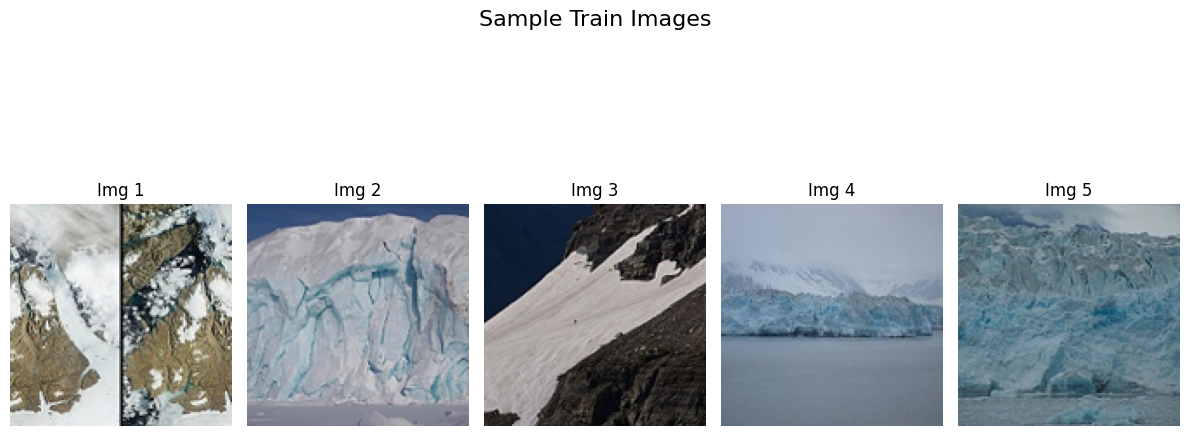

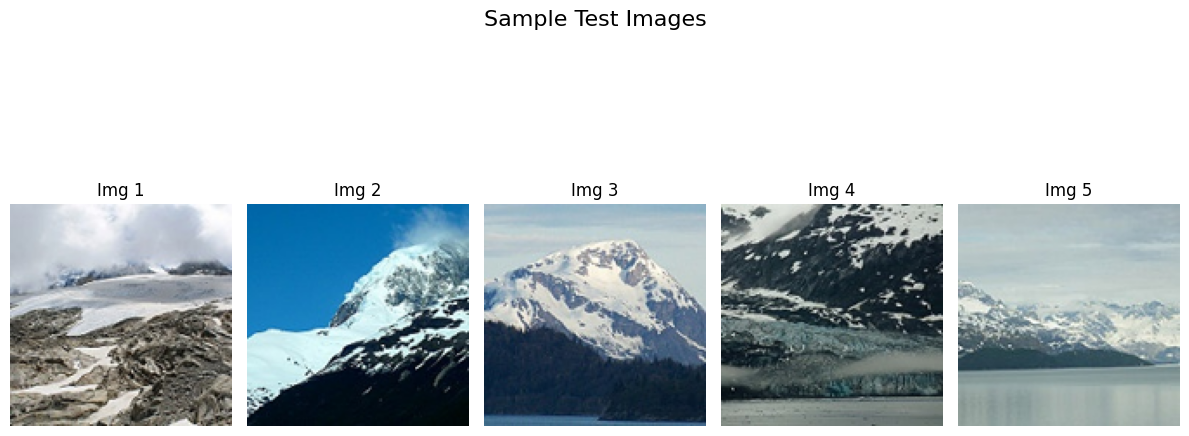

In [ ]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Set your dataset root directory
dataset_root = "/content/intel-image-classification"  # 🔁 Change this to your actual dataset path

# Paths to train and test directories
train_dir = os.path.join(dataset_root, 'seg_train/seg_train')
test_dir = os.path.join(dataset_root, 'seg_test/seg_test')

# Function to show sample images
def show_sample_images(folder, title):
    image_files = glob.glob(os.path.join(folder, '*/*.jpg'))[:5]  # Load 5 images
    plt.figure(figsize=(12, 6))  # Wider display
    for i, file in enumerate(image_files):
        img = Image.open(file).resize((128, 128))  # Resize for consistency
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Img {i+1}")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Display 5 sample images from train and test
show_sample_images(train_dir, "Sample Train Images")
show_sample_images(test_dir, "Sample Test Images")


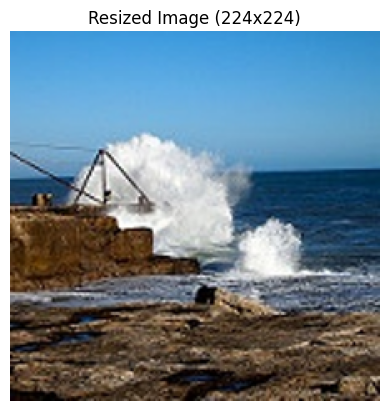

In [ ]:
import os
from PIL import Image

# ✅ Correct image path (no leading slash in second argument!)
image_path = os.path.join(dataset_root, 'seg_test/seg_test/sea/20072.jpg')

# ✅ Open, resize, and show image
image = Image.open(image_path)
resized_image = image.resize((224, 224))
resized_image.show()  # On some systems, this may not display in notebooks

# Optional: If you're in a Jupyter Notebook or Google Colab, use this instead to display:
import matplotlib.pyplot as plt
plt.imshow(resized_image)
plt.axis('off')
plt.title("Resized Image (224x224)")
plt.show()



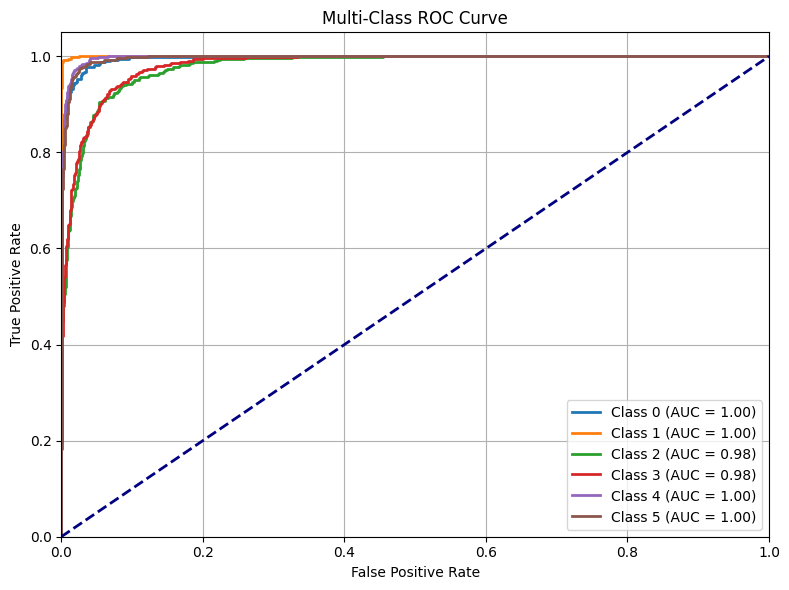

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# ✅ Use your model's predictions and true labels
# preds: softmax probabilities (shape: [num_samples, num_classes])
# y_true: true labels (integers), shape: [num_samples]

# Binarize the labels for multi-class ROC (One-vs-Rest)
y_true_bin = label_binarize(y_true, classes=list(range(preds.shape[1])))
n_classes = y_true_bin.shape[1]

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], preds[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot chance line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
